<center> <h1>Día 1</h1> </center>
<center> <h2>Conociendo RDKit</h2> </center>

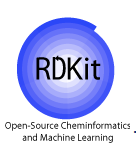
RDKit es un software quimioinformático de código abierto. 


- Homepage: http://www.rdkit.org Documentation, links
- Github (https://github.com/rdkit) Downloads, bug tracker, git repository
- Sourceforge (http://sourceforge.net/projects/rdkit) Mailing lists
- Blog (https://greglandrum.github.io/rdkit-blog/) Tips, tricks, random stuff
- Tutorials (https://github.com/rdkit/rdkit-tutorials) Jupyter-based tutorials for using the RDKit
- KNIME integration (https://github.com/rdkit/knime-rdkit) RDKit nodes for KNIME

---
<center> <h2>Antes de comenzar</h2> </center>

En la celda que se encuentra a continuación vamos a importar todas las librerías que se van a usar.

❗ Para correr la celda podes apretar el boton "Run" o usar el comando "Ctrl + Enter"

👇

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import SimilarityMaps

A lo largo de este día vamos a estar trabajando con los comandos básicos de RDKit para trabajar con una molécula.

Esta guía está elaborada en base a https://www.rdkit.org/docs/GettingStartedInPython.html

En el caso de que quieras profundizar en algún comando podrás encontrar más información en ese link.

---
<center> <h2>Manos a la obra</h2> </center>

En este práctico vamos a usar como ejemplo la molécula <b>"Benznidazol"</b>

Este compuesto químico cuenta con la siguiente estructura:
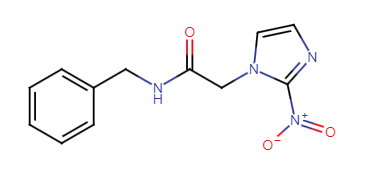

Es usado como tratamiento para la enfermedad del Chagas.

Para ver más información sobre el compuesto podemos ingresar a PubChem: https://pubchem.ncbi.nlm.nih.gov/compound/Benznidazole

💭 Bajen hasta la sección "Names and Identifiers" ¿Que ven ahí?

-----

En esta sección podemos ver que un compuesto químico puede escribirse de muchas maneras: 
- The International Chemical Identifi
er (InChI)
- A 27-character hash code derived from an InChI (InChIKey)
- The Simplified Molecular-Input Line-Entry System (SMILES)

Para comenzar a trabajar vamos a generar una variable con la notación del compuesto. En este caso, vamos a usar la notación en smiles.

❗ Para correr la celda podes apretar el boton "Run" o usar el comando "CTRL + Enter"

👇

In [2]:
smiles = 'C1=CC=C(C=C1)CNC(=O)CN2C=CN=C2[N+](=O)[O-]'

Al generar la variable llamada "smiles", guardamos la estructura en una palabra que podemos en el resto del código.

Vamos a ver que pasa si imprimimos la variable:

❗ Para correr la celda podes apretar el boton "Run" o usar el comando "CTRL + Enter"

👇

In [3]:
smiles

'C1=CC=C(C=C1)CNC(=O)CN2C=CN=C2[N+](=O)[O-]'

La variable esta guardada en formato "str" o string. Este es el formato que usa python para representar texto.

Para verificarlo podemos pedirle a Python que nos diga de que el tipo de la variable usando la función 

`type()`

In [4]:
type(smiles)

str

Lo que buscamos es poder trabajar con la molécula como tal, no como cadena de texto. 

<b>Acá es donde entra RDKit!</b>

RDKit cuenta con una función llamada `Chem`

Esta función se escribe continuada por la acción que queremos que haga. 
Vamos a usarla mucho, a medida que la usemos vamos a ver que se puede hacer con ella.

En este link encontrarán todas las opciones posibles: https://www.rdkit.org/docs/source/rdkit.Chem.html

En este caso, la función va a estar seguida de `MolFromSmiles`, porque queremos que transforme el string que generamos a una molécula.

👇

In [5]:
molecula = Chem.MolFromSmiles(smiles)

💭 ¿Qué pasa si ahora imprimimos la variable?

❗ Escribí el comando en la celda que se encuentra debajo

👇

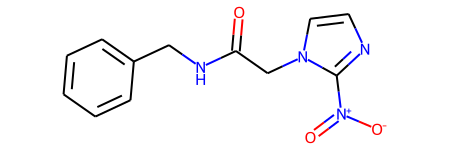

In [6]:
molecula

💭 ¿Lo que observas en la celda anterior corresponde con lo que viste en PubChem?


💭 ¿De que tipo es la variable?

❗ Escribí el comando en la celda que se encuentra debajo

👇

In [7]:
type(molecula)

rdkit.Chem.rdchem.Mol

---
<center> <h2>¿Qué podemos hacer con una molécula?</h2> </center>


Ahora que ya tenemos la estructura del <b>Benznidazol</b> guardada en una variable de tipo <i>molécula</i> vamos a empezar a explorar que podemos hacer con eso

Podemos recorrer individualmente los átomos que forman la molécula usando la función `GetAtomWithIdx()`

A la función tenemos que indicarle cual átomo queremos ver. RDKit le otorga un número a cada átomo, podemos verlo usando el siguiente comando:

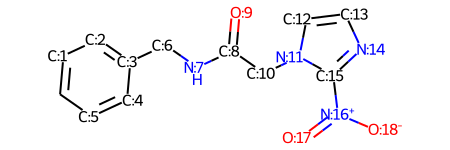

In [8]:
for atom in molecula.GetAtoms():
    atom.SetAtomMapNum(atom.GetIdx())
    
molecula

<b> Usando los números o indices que representan a cada átomo, podemos obtener diferentes parámetros. </b>

---

Con la función `.GetSymbol()` podemos obtener el simbolo atómico.

Vamos a probarlo con el átomo del indice 7

👇

In [9]:
molecula.GetAtomWithIdx(7).GetSymbol()

'N'

💭 ¿Cuál es el simbolo del átomo correspondiente al indice 9?


❗ Escribí el comando en la celda que se encuentra debajo

👇

In [10]:
molecula.GetAtomWithIdx(9).GetSymbol()

'O'

---

Con la función `.GetAtomicNum()` podemos obtener el número atómico.

Vamos a probarlo con el átomo del indice 7

👇

In [11]:
molecula.GetAtomWithIdx(2).GetAtomicNum()

6

💭 ¿Cuál es el número atómico correspondiente al indice 3?


❗ Escribí el comando en la celda que se encuentra debajo

👇

In [12]:
molecula.GetAtomWithIdx(3).GetAtomicNum()

6

---

Con la función `.GetExplicitValence()` podemos obtener la valencia explícita del átomo.

Vamos a probarlo con el átomo del indice 7

👇

In [13]:
molecula.GetAtomWithIdx(7).GetExplicitValence()

2

💭 ¿Cuál es la valencia explícita correspondiente al indice 10?


❗ Escribí el comando en la celda que se encuentra debajo

👇

In [14]:
molecula.GetAtomWithIdx(10).GetExplicitValence()

2

---

Con la función `.GetBondType()` podemos obtener el tipo de enlace.

Vamos a probarlo con el átomo del indice 7

👇

In [15]:
molecula.GetBonds()[7].GetBondType()

rdkit.Chem.rdchem.BondType.SINGLE

In [16]:
print(molecula.GetBonds()[7].GetBondType())

SINGLE


💭 ¿Cuál es el tipo de enlace correspondiente al indice 14?


❗ Escribí el comando en la celda que se encuentra debajo

👇

In [17]:
print(molecula.GetBonds()[14].GetBondType())

AROMATIC


---

Con la función `.GetBondBetweenAtoms` podemos obtener el tipo de enlace entre dos átomos.

👇

In [18]:
molecula.GetBondBetweenAtoms(0,1).GetBondType()

rdkit.Chem.rdchem.BondType.AROMATIC

---

También podemos hacer consultas sobre caracterísiticas puntuales. 

La respuesta puede ser <b> verdadero (true) </b> o <b>falsa (false). </b>

In [19]:
molecula.GetAtomWithIdx(0).IsInRing()

True

In [20]:
molecula.GetAtomWithIdx(1).IsInRingSize(5)

False

In [21]:
molecula.GetAtomWithIdx(1).IsInRingSize(6)

True

Pueden ver todos las funciones de este módulo entrando a este link: https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html

En el caso de que quieras profundizar en alguna (o buscar nuevas) ahi encontrarás toda la información

---

Como pueden ver, RDKit genera una molécula pero no le agrega hidrógenos automáticamente. 

Se pueden agregar usando la función `.AddHs()`

In [22]:
molecula_h = Chem.AddHs(molecula)

💭 ¿Como visualizarías la molécula que generamos recién?

❗ Escribí el comando en la celda que se encuentra debajo

👇

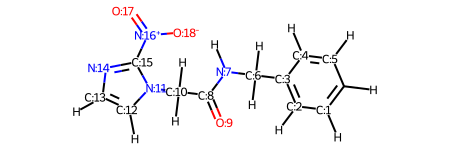

In [23]:
molecula_h

Vamos a verificar que los hidrógenos fueron adicionados contando la cantidad total de átomos de cada molécula

In [24]:
print(molecula.GetNumAtoms())
print(molecula_h.GetNumAtoms())

19
31


👇 Podemos dibujar ambas moléculas usando el siguiente comando 👇

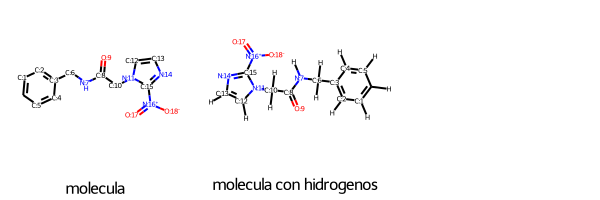

In [25]:
Draw.MolsToGridImage([molecula,molecula_h],legends=['molecula sin hidrogenos','molecula con hidrogenos'])

---
<center> <h2>Identificando subestructuras</h2> </center>


Ahora que ya vimos que podemos recorrer los átomos de la molécula, vamos a identificar si cuenta con algún grupo funcional específico

Primero tenemos que definir que grupo funcional queremos buscar. 

En este caso vamos a buscar si tiene un benceno:
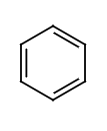

Para hacerlo, tenemos que indicarle a RDKit cual es el smiles del benceno:

In [26]:
benceno = 'C1=CC=CC=C1'

Vamos a usar la función `MolFromSmiles`, porque queremos que RDKit transforme el string que generamos a una molécula.

In [27]:
substructura = Chem.MolFromSmiles(benceno)

Podemos visualizarlo indicando la variable correspondiente a la molécula

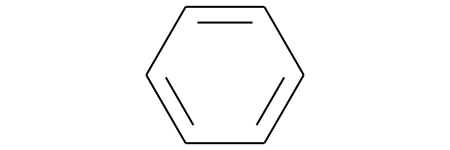

In [28]:
substructura

Ahora vamos a resaltar en que región de la molécula se encuentra el benceno

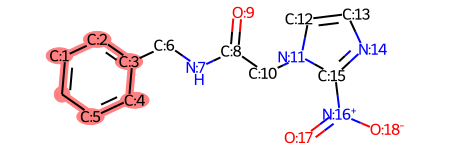

In [29]:
hit_ats = list(molecula.GetSubstructMatch(substructura))
hit_bonds = []
for bond in substructura.GetBonds():
    aid1 = hit_ats[bond.GetBeginAtomIdx()]
    aid2 = hit_ats[bond.GetEndAtomIdx()]
    hit_bonds.append(molecula.GetBondBetweenAtoms(aid1,aid2).GetIdx())
d = rdMolDraw2D.MolDraw2DSVG(500, 500) # or MolDraw2DCairo to get PNGs
d = rdMolDraw2D.PrepareAndDrawMolecule(d, molecula, highlightAtoms=hit_ats,
                                   highlightBonds=hit_bonds)
molecula

Podemos guardar las imagenes que generamos de las moléculas usando la función `MolToFile`

In [30]:
Draw.MolToFile(molecula,'mol.png') 


💭 ¿Podés resaltar la región del <b>Benznidazol</b> que tenga un <b>imidazol</b>?
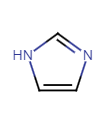


💡 Pista: el smiles del <b>Imidazol</b> es 'N1C=CN=C1'


❗ Escribí el comando en la celda que se encuentra debajo

👇

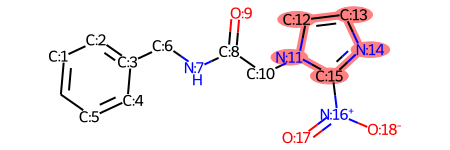

In [31]:
imidazol = 'N1C=CN=C1'
substructura = Chem.MolFromSmiles(imidazol)

hit_ats = list(molecula.GetSubstructMatch(substructura))
hit_bonds = []
for bond in substructura.GetBonds():
    aid1 = hit_ats[bond.GetBeginAtomIdx()]
    aid2 = hit_ats[bond.GetEndAtomIdx()]
    hit_bonds.append(molecula.GetBondBetweenAtoms(aid1,aid2).GetIdx())
d = rdMolDraw2D.MolDraw2DSVG(500, 500) # or MolDraw2DCairo to get PNGs
d = rdMolDraw2D.PrepareAndDrawMolecule(d, molecula, highlightAtoms=hit_ats,
                                   highlightBonds=hit_bonds)
molecula

---

Cómo pueden ver, todo lo que fuimos haciendo fue quedando guardado en la molécula original:

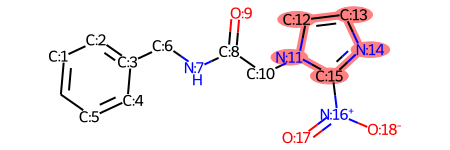

In [32]:
molecula

Si quieren obtener la molécula limpia, tienen que volver a generarla a partir del smiles

In [33]:
molecula = Chem.MolFromSmiles(smiles)

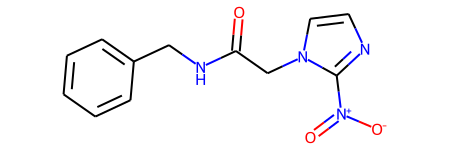

In [34]:
molecula

---
<center> <h2>Actividad</h2> </center>

<center> <h3>¡Ahora te toca hacer el análisis a vos!</h3> </center>

Vamos a trabajar con la molécula <b>"Nifurtimox"</b>

Este compuesto químico cuenta con la siguiente estructura:

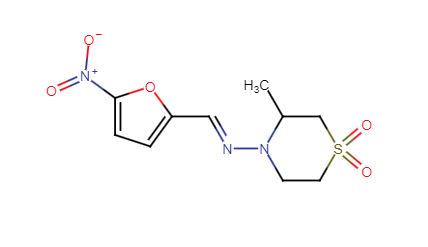

También es usado como tratamiento para la enfermedad del Chagas.


❗ Seguí los siguientes pasos:

1) Busca el smiles de la molécula <b>Nifurtimox</b>
2) Generá la molécula usando RDKit
3) Dibujá la estructura de la molécula
4) Indicá cuantos átomos de Nitrógeno tiene y que tipo de enlace tiene de cada uno.
5) Realizá un esquema resaltando el grupo funcional <b>oxolano</b>

💡 Pista: Podés buscar la estructura en smiles en https://pubchem.ncbi.nlm.nih.gov/


❗ Escribí los comandos en la celda que se encuentra debajo o agregá la cantidad de celdas que consideres necesarias.

👇